In [ ]:
import pandas as pd


#KNN uploading and preparing data



In [ ]:
# Load the Excel file
# Assuming the file is in the root of the Colab environment
file_path = "YM_KNN.xlsx"
data = pd.read_excel(file_path)
# Display the first few rows
print(data.head())

   Attribute 1  Attribute 2  Attribute 3  Attribute 4  Attribute 5  \
0         6.92         9.81         8.91         9.85         8.94   
1         8.91         7.96         6.90         5.89         7.97   
2         4.94         4.95         9.94         7.97         9.90   
3         2.85         1.79         2.82         4.67         4.68   
4         5.60         6.57         4.62         5.53         2.75   

   Attribute 6  Attribute 7 Class  
0         3.89         4.94     B  
1         1.96         3.98     D  
2         2.93         2.95     D  
3         4.57         5.49     D  
4         7.90         6.93     D  


#Separating input from output then Splitting data

In [ ]:
# Separate features and target
X = data.iloc[:, :-1]   # First 7 columns
y = data.iloc[:, -1]    # Last column (Class)

In [ ]:
#Encoding the alphabetical classes into numerical ones, necessary for KNN python implementation
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
# Map original classes to numbers (e.g., A=0, B=1, etc.)
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'A': np.int64(0), 'B': np.int64(1), 'C': np.int64(2), 'D': np.int64(3)}


In [ ]:
#Splitting Data
from sklearn.model_selection import train_test_split #necessary tool for splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=6, random_state=42, stratify=y_encoded
)#test_size can be a ratio or a number
#Random state means model would be shuffled the same exact way


#Implementing KNN

In [ ]:
#Running Model, Model Training
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)#Choosing k to be 3
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#Evaluating the Model

In [ ]:
#Print KNN Classification report
from sklearn.metrics import classification_report # Import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4

    accuracy                           0.83         6
   macro avg       0.50      0.50      0.50         6
weighted avg       0.83      0.83      0.83         6



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

#Evaluating the Model using Different K's

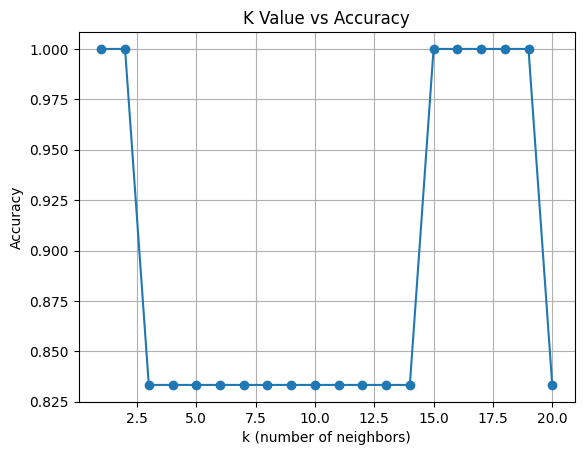

In [ ]:
from sklearn.metrics import accuracy_score # Import accuracy_score
import matplotlib.pyplot as plt # Import matplotlib for plotting

accuracies = []
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    accuracies.append(acc)

# Plot accuracy vs k
plt.plot(range(1, 21), accuracies, marker='o')
plt.title("K Value vs Accuracy")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()